# Simple Linear Regression

In [25]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


## Explore the dataframe


To import a CSV file into a DataFrame using the `pandas` library, you can specify the file path in two ways:

1. **Local Path**: The CSV file is stored locally on your computer.

2. **URL**: The CSV file is hosted online and accessible via a URL.

In the provided code, both methods are demonstrated:


In [52]:
# Importing the Advertising dataset

# advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
advertising = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/Advertising.csv', usecols=[1,2,3,4])


To explore the initial rows of the `advertising` DataFrame, you can use the `head()` method:


In [29]:
# Explore the data
advertising.head(10)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


To generate a synthetic descriptive table of the `advertising` dataset, you can use the `describe()` method from the pandas library:

In [30]:
# Generate descriptive statistics of the advertising dataset
advertising.describe().T


,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [31]:
# Correlation matrix
correlation_matrix = advertising.corr()
correlation_matrix


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


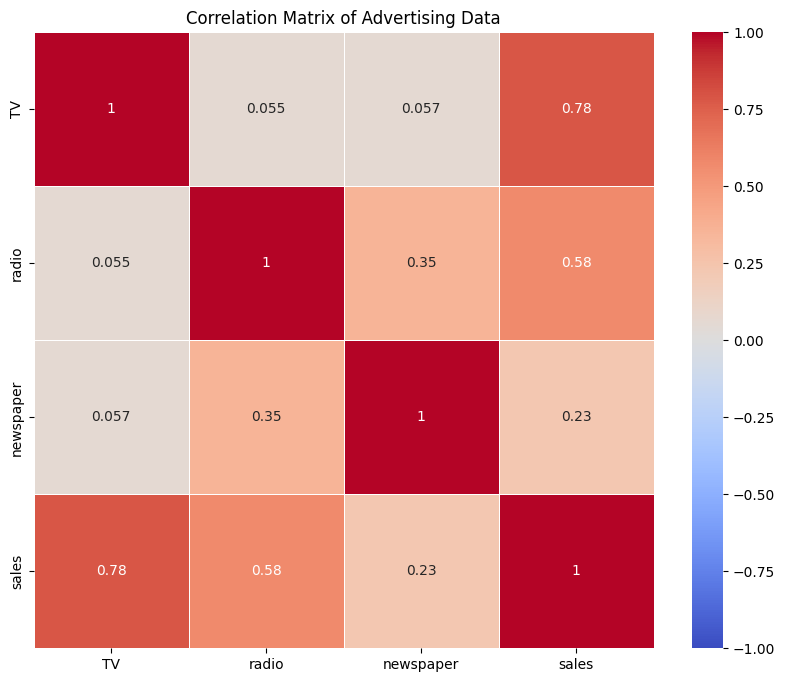

In [32]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            vmin=-1,
            vmax=1)
plt.title('Correlation Matrix of Advertising Data')
plt.show()


The provided code utilizes Seaborn's `regplot` function to create a scatter plot with a fitted regression line, illustrating the relationship between radio advertising expenditures and sales:

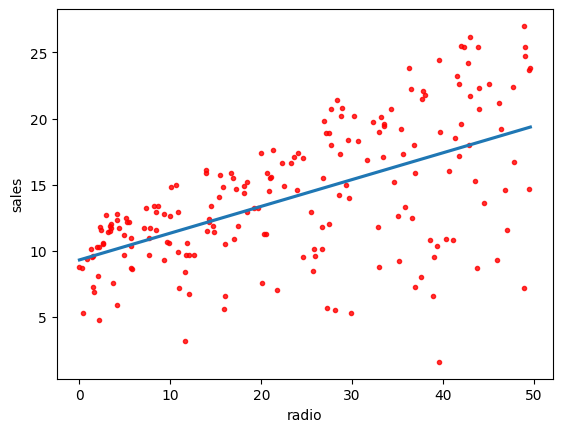

In [33]:
# Create a scatter plot with a regression line
sns.regplot(
    x=advertising.radio,
    y=advertising.sales,
    order=1,  # Specifies a linear regression model: increase to overfit! default=1
    ci=None,  # Omits the confidence interval for the regression line
    scatter_kws={'color': 'r', 's': 9}  # Sets the color and size of the scatter plot points
)

# Display the plot
plt.show()


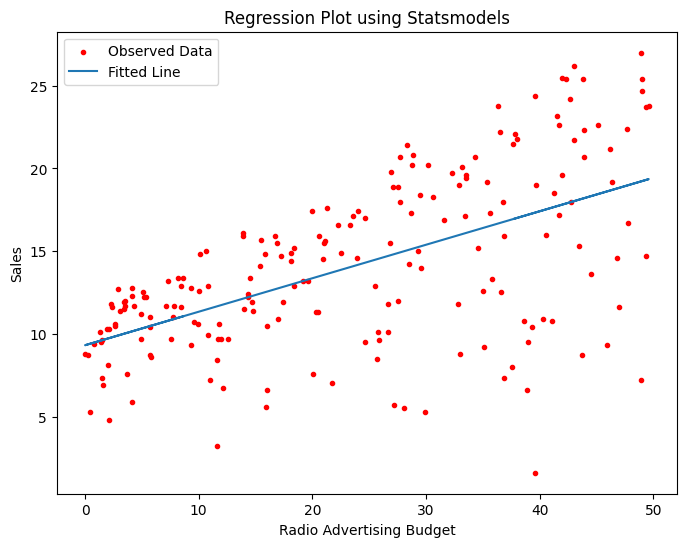

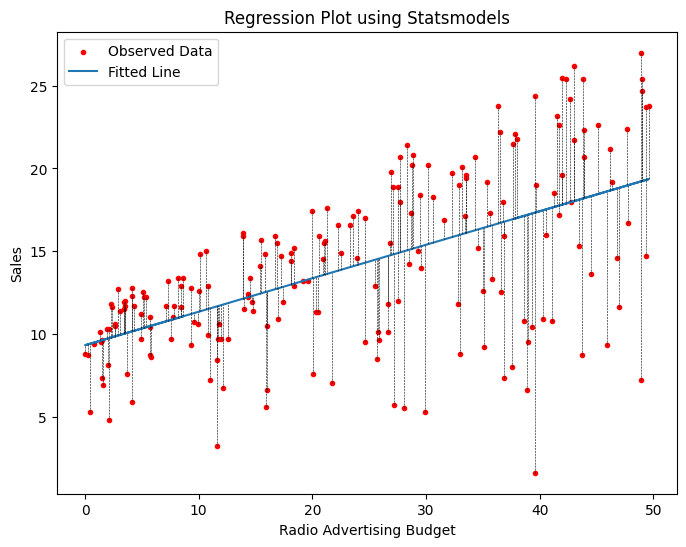

In [34]:
import statsmodels.api as sm


# Stima del modello di regressione lineare
model = smf.ols('sales ~ radio', data=advertising).fit()

# Estrazione dei coefficienti stimati dal modello
intercept, slope = model.params

# Calcolo dei valori previsti con il modello stimato
advertising['predicted_sales'] = intercept + slope * advertising.radio

# Creazione del grafico con la regressione stimata
plt.figure(figsize=(8, 6))
plt.scatter(advertising.radio, advertising.sales, color='r', s=9, label="Observed Data")
plt.plot(advertising.radio, advertising.predicted_sales, label="Fitted Line")

# Etichette e titolo
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.title('Regression Plot using Statsmodels')
plt.legend()

# Mostra il grafico
plt.show()


# Creazione del grafico con la regressione stimata
plt.figure(figsize=(8, 6))
plt.scatter(advertising.radio, advertising.sales, color='r', s=9, label="Observed Data")
plt.plot(advertising.radio, advertising.predicted_sales, label="Fitted Line")

# Linee delle distanze tra i punti osservati e la retta di regressione
for i in range(len(advertising)):
    plt.plot([advertising.radio[i], advertising.radio[i]], 
             [advertising.sales[i], advertising.predicted_sales[i]], 'k--', lw=0.4)

# Etichette e titolo
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.title('Regression Plot using Statsmodels')
plt.legend()

# Mostra il grafico
plt.show()


## Parameter Estimation



In this section, we will estimate parameters using two prominent Python libraries:

- **statsmodels**
- **scikit-learn**

**Comparison between scikit-learn and statsmodels:**

- **scikit-learn**: Primarily designed for predictive modeling, scikit-learn focuses on model performance metrics. It does not automatically provide statistical details such as t-values, p-values, or standard errors. To obtain these, one would need to use statsmodels or additional statistical methods.

- **statsmodels**: Tailored for statistical analysis, statsmodels offers comprehensive outputs, including detailed statistical tests and metrics, making it suitable for in-depth data exploration and inferential statistics.


### 1) Statsmodels library



In this section, we will perform an Ordinary Least Squares (OLS) regression analysis to examine the relationship between sales and radio advertising expenditures using the `statsmodels` library in Python.

**Explanation:**

- **Model Specification**: The formula `'sales ~ radio'` indicates that we are modeling `sales` as a function of `radio` advertising expenditures, where `sales` is the dependent variable and `radio` is the independent variable.

- **Fitting the Model**: The `fit()` method estimates the parameters of the OLS regression model using the provided `advertising` dataset.

- **Displaying the Summary Table**: The `summary()` method generates a comprehensive summary of the regression results. Accessing `tables[1]` specifically retrieves the table containing the estimated coefficients, their standard errors, t-values, and associated p-values.

This analysis helps us understand the influence of radio advertising on sales by quantifying the relationship between the two variables.

In [35]:
# Fit the OLS model
est = smf.ols('sales ~ radio', data=advertising).fit()

# Display the summary table of regression coefficients
est.summary().tables[1] # .tables[1] returns the second table in the summary


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [36]:
# Store the regression coefficients
statsmodels_slope = est.params['radio']
statsmodels_intercept = est.params['Intercept']


### 2) Scikit-learn




Scikit-learn, often abbreviated as `sklearn`, is a powerful open-source Python library designed for machine learning and data analysis. Built upon foundational libraries like NumPy and SciPy, it offers efficient implementations of a wide range of machine learning algorithms

**Explanation:**

- **Data Preparation**: The predictor variable `radio` is extracted from the `advertising` DataFrame and reshaped into a 2D array using `reshape(-1, 1)`, as scikit-learn's `LinearRegression` expects the input features in this format. The target variable `sales` is assigned to `y`.

- **Model Initialization and Fitting**: An instance of `LinearRegression` is created and fitted to the data using `model.fit(X, y)`, which computes the best-fit line for predicting `sales` based on `radio` advertising expenditures.

- **Retrieving Parameters**: The intercept and slope of the regression line are obtained from `model.intercept_` and `model.coef_[0]`, respectively.


This approach ensures that the predictor variable is correctly shaped for model fitting and that parameter comparisons account for potential floating-point precision issues.

In [37]:
# Reshape the predictor variable
X = advertising['radio'].values.reshape(-1, 1)
y = advertising['sales']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [38]:
# Accessing the slope (coefficient) and intercept
sklearn_slope = model.coef_[0]
sklearn_intercept = model.intercept_


In [39]:
print(f'Sklearn - Intercept: {sklearn_intercept:.2f}\nSklearn - Slope: {sklearn_slope:.2f}\n')
print(f'Statsmodels - Intercept: {statsmodels_intercept:.2f}\nStatsmodels - Slope: {statsmodels_slope:.2f}')


Sklearn - Intercept: 9.31
Sklearn - Slope: 0.20

Statsmodels - Intercept: 9.31
Statsmodels - Slope: 0.20


### Inspect Regression results

In [40]:
# Display the summary table of regression coefficients

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 11 May 2025   Prob (F-statistic):           4.35e-19
Time:                        15:41:56   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Predizioni
y_pred = model.predict(X)

# Calcolo di R² e MSE
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

In [42]:
print(f'R²: {r_squared:.2f}\nMSE: {mse:.2f}')

R²: 0.33
MSE: 18.09


# Multiple Linear Regression


In [43]:
# Parameters estimation with statsmodels
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 11 May 2025   Prob (F-statistic):           1.58e-96
Time:                        15:41:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Parameters estimation with statsmodels
est = smf.ols('sales ~ TV + radio', advertising).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 11 May 2025   Prob (F-statistic):           4.83e-98
Time:                        15:41:56   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

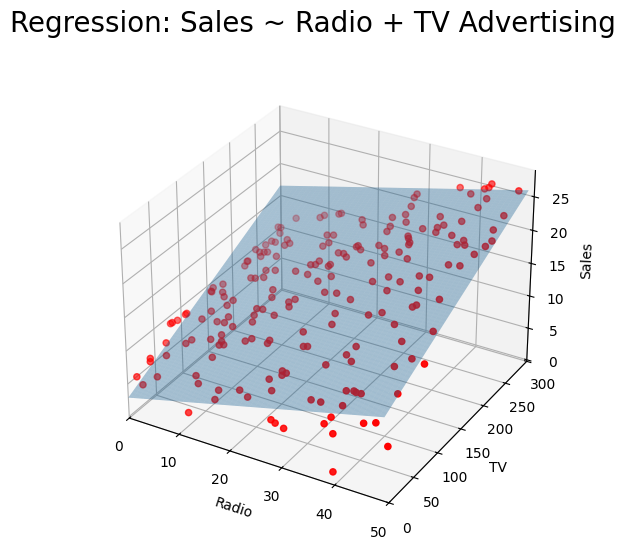

In [45]:
# Parameters estimation with sklearn
regr = LinearRegression()

X = advertising[['radio', 'TV']]
y = advertising.sales

regr.fit(X,y)

# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

# Create plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax.plot_surface(B1, B2, Z, rstride=1, cstride=1, alpha=0.4)
ax.scatter(advertising['radio'], advertising['TV'], advertising['sales'], c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0, 50)
ax.set_ylabel('TV')
ax.set_ylim(0, 300)
ax.set_zlabel('Sales')

plt.show()


In [46]:
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.700000,74.375000,149.750000,218.825000,296.400000
radio,200.0,23.2640,14.846809,0.000000,9.975000,22.900000,36.525000,49.600000
newspaper,200.0,30.5540,21.778621,0.300000,12.750000,25.750000,45.100000,114.000000
sales,200.0,14.0225,5.217457,1.600000,10.375000,12.900000,17.400000,27.000000
predicted_sales,200.0,14.0225,3.006416,9.311638,11.331534,13.948792,16.707797,19.355429


In [47]:
advertising[["radio","TV"]]

,radio,TV
0,37.8,230.1
1,39.3,44.5
2,45.9,17.2
3,41.3,151.5
4,10.8,180.8
...,...,...
195,3.7,38.2
196,4.9,94.2
197,9.3,177.0
198,42.0,283.6


In [48]:
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 11 May 2025   Prob (F-statistic):           4.83e-98
Time:                        15:41:58   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""